 1. Introduction

This project focuses on analyzing the Google Play Store dataset to understand app ratings, installs, pricing, and user behavior patterns.

In [2]:
import pandas as pd

 2. Data Cleaning & Preprocessing

1.Removed duplicate apps

2 Clean Price Column

3.Rating Null Fill

4.Removes Duplicates


In [6]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


➜Firstly we check basic information  


In [17]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            7418 non-null   object 
 5   Installs        8886 non-null   float64
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   float64
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(3), object(10)
memory usage: 971.9+ KB


,Rating,Installs,Price
count,8886.000000,8.886000e+03,8886.000000
mean,4.187959,1.650061e+07,0.963526
std,0.522428,8.640413e+07,16.194792
min,1.000000,1.000000e+00,0.000000
25%,4.000000,1.000000e+04,0.000000
50%,4.300000,5.000000e+05,0.000000
75%,4.500000,5.000000e+06,0.000000
max,5.000000,1.000000e+09,400.000000


1. Remove dupllicate Apps

In [18]:
df.drop_duplicates(subset='App', inplace=True)

In [20]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

2. Price Column CLean

In [24]:
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [25]:
df['Price'].head()
df['Price'].dtype

dtype('float64')

In [26]:
import numpy as np

df['Size'] = df['Size'].replace('Varies with device', np.nan)

df['Size'] = df['Size'].str.replace('M', '', regex=False)
df['Size'] = df['Size'].str.replace('k', '', regex=False)

df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [27]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

3. Rating Null Fill

In [28]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [29]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

4. Remove Duplicate 

In [30]:
df.drop_duplicates(subset='App', inplace=True)

In [31]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1169
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [32]:
df.fillna(0, inplace=True)

 3. Exploratory Data Analysis (EDA)

•Top Rated Apps

•Category Wise Analysis

•Free vs Paid Comparison

•Correlation Analysis

1. Top 10 Highest Rated Apps

In [33]:
df.sort_values(by='Rating', ascending=False)[['App','Rating']].head(10)

,App,Rating
8327,The Divine Feminine App: the DF App,5.0
6807,Jabbla BT,5.0
9188,EB Scanner,5.0
9194,UP EB Bill Payment & Details,5.0
9218,EB Cash Collections,5.0
7270,CF Townsville,5.0
5482,meStudying: AP English Lit,5.0
7258,CF,5.0
9245,EC Calgary,5.0
9246,Victoria EC,5.0


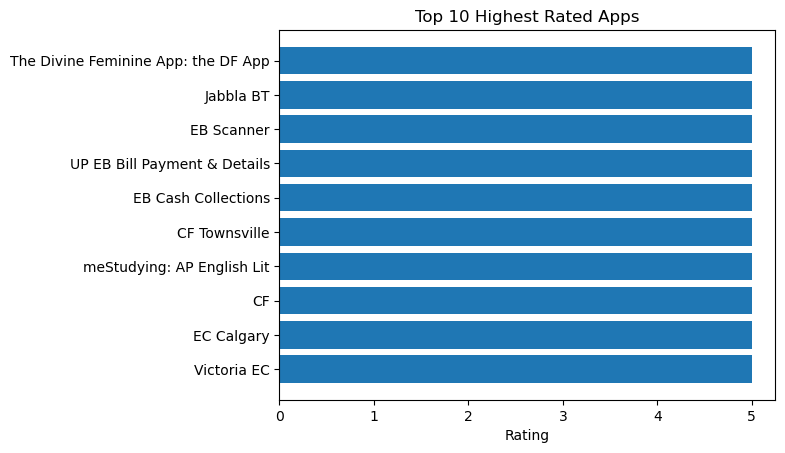

In [34]:
import matplotlib.pyplot as plt

top10 = df.sort_values(by='Rating', ascending=False).head(10)

plt.figure()
plt.barh(top10['App'], top10['Rating'])
plt.xlabel("Rating")
plt.title("Top 10 Highest Rated Apps")
plt.gca().invert_yaxis()
plt.show()

2. Category Wise Average Rating 

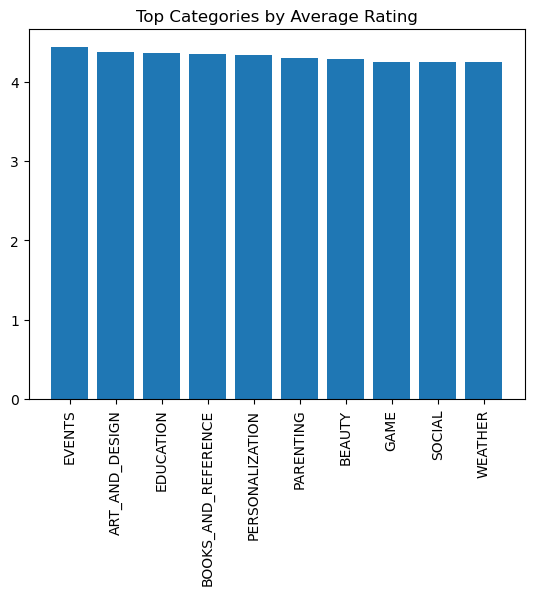

In [35]:
category_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure()
plt.bar(category_rating.index, category_rating.values)
plt.xticks(rotation=90)
plt.title("Top Categories by Average Rating")
plt.show()

3. Free vs Paid Apps

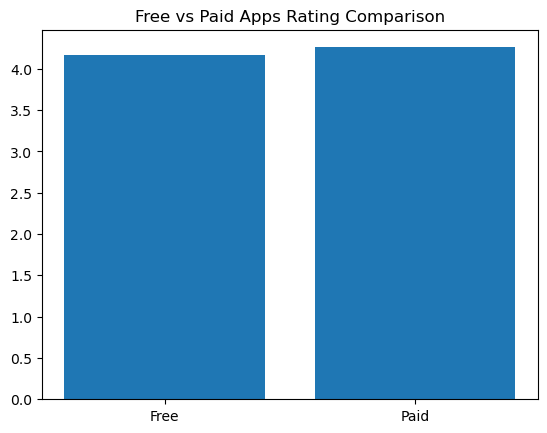

In [36]:
type_rating = df.groupby('Type')['Rating'].mean()

plt.figure()
plt.bar(type_rating.index, type_rating.values)
plt.title("Free vs Paid Apps Rating Comparison")
plt.show()

4. Correlation Heatmap

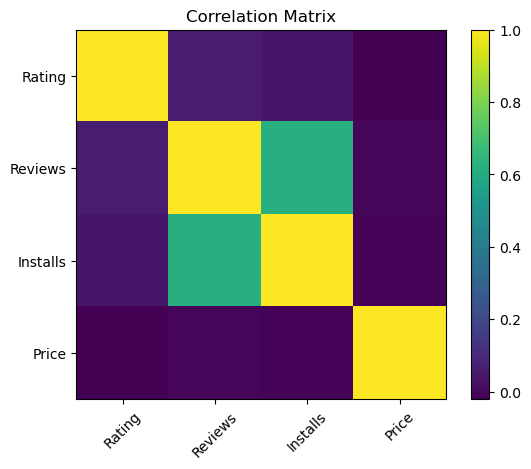

In [37]:
plt.figure()
plt.imshow(df[['Rating','Reviews','Installs','Price']].corr())
plt.colorbar()
plt.xticks(range(4), ['Rating','Reviews','Installs','Price'], rotation=45)
plt.yticks(range(4), ['Rating','Reviews','Installs','Price'])
plt.title("Correlation Matrix")
plt.show()

 4. Conclusion

The analysis reveals that free apps dominate the platform in terms of installs and ratings. User engagement (reviews) strongly influences installs.